In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [40]:
df = pd.read_csv("../data/AirlineSatisfaction/train.csv", index_col=0)

In [41]:
df["isMale"] = df["Gender"].map({"Male": 1, "Female": 0}).astype(bool)
df["isLoyal"] = df["Customer Type"].map({"Loyal Customer": 1, "disloyal Customer": 0}).astype(bool)
df["isForBusiness"] = df["Type of Travel"].map({"Business travel": 1, "Personal Travel": 0}).astype(bool)
df["isSatisfied"] = df["satisfaction"].map({"satisfied": 1, "neutral or dissatisfied": 0}).astype(bool)

In [42]:
cols = ["Gender", "Customer Type", "id", "Type of Travel", "satisfaction"]
df.drop(columns=cols, inplace=True)

In [43]:
df = pd.get_dummies(df, columns=["Class"], prefix="Class", dtype=bool, drop_first=True)
df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,isMale,isLoyal,isForBusiness,isSatisfied,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,True,True,False,False,False,True
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,True,False,True,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,False,True,True,True,False,False
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,False,True,True,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,3,2,3,0.0,False,False,True,False,True,False
103900,49,2347,4,4,4,4,2,4,5,5,...,5,4,0,0.0,True,True,True,True,False,False
103901,30,1995,1,1,1,3,4,1,5,4,...,5,4,7,14.0,True,False,True,False,False,False
103902,22,1000,1,1,1,5,1,1,1,1,...,4,1,0,0.0,False,False,True,False,True,False


In [44]:
categorical_cols = df.select_dtypes(include=["bool"]).columns
numerical_cols = df.columns.difference(categorical_cols)

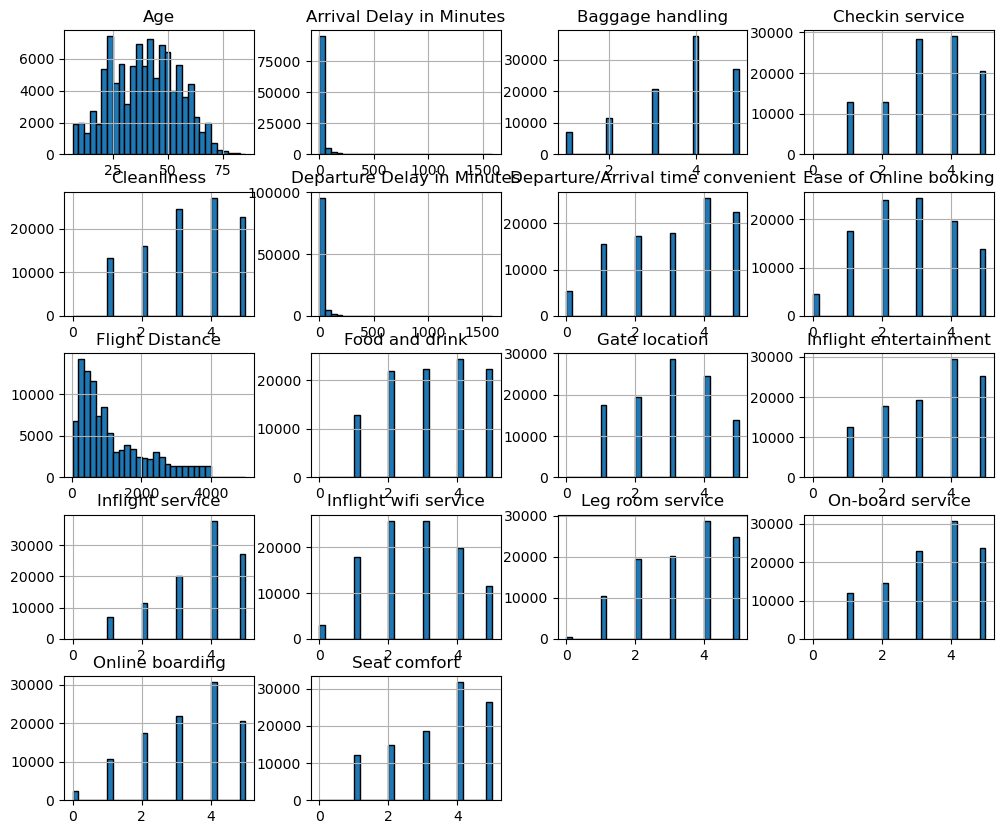

In [45]:
df[numerical_cols].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.show()

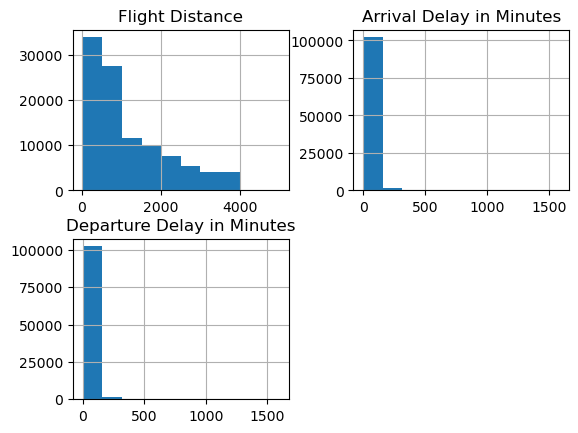

In [46]:
poorly_distributed_cols = ["Flight Distance", "Arrival Delay in Minutes", "Departure Delay in Minutes"]
df[poorly_distributed_cols].hist()
plt.show()

In [47]:
df["Arrival Delay in Minutes"].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [48]:
df["Departure Delay in Minutes"].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

<Axes: >

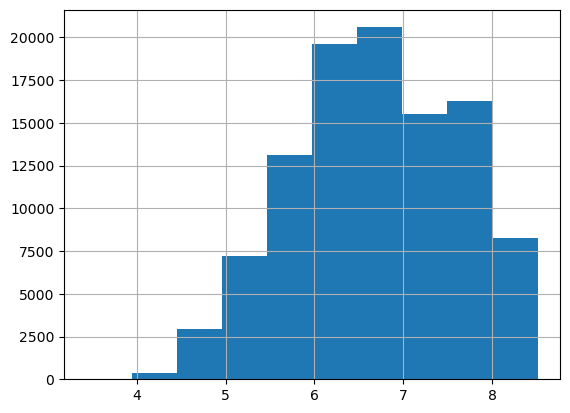

In [49]:
np.log(df["Flight Distance"]).hist()

In [50]:
df["Flight Distance"] = np.log(df["Flight Distance"])
df["arrivalDelay"] = df["Arrival Delay in Minutes"] > 0 
df["departureDelay"] = df["Departure Delay in Minutes"] > 0 
df.drop(columns=["Arrival Delay in Minutes", "Departure Delay in Minutes"], inplace=True) 

In [51]:
categorical_cols = df.select_dtypes(include=["bool"]).columns
numerical_cols = df.columns.difference(categorical_cols)

In [52]:
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df = df.astype(float)
df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,isMale,isLoyal,isForBusiness,isSatisfied,Class_Eco,Class_Eco Plus,arrivalDelay,departureDelay
0,-1.745279,-0.624110,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,1.156436,1.305870,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,-0.951360,-1.356305,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,0.305848,-1.742292,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,-0.885200,0.367182,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,0.305848,1.305870,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,-0.951360,-0.405778,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,0.305848,-0.980251,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.430397,-1.458354,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,-0.544740,-0.218211,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.083680,-1.576615,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,-0.926545,-1.091211,-1.018885,...,-0.544740,-0.980251,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
103900,0.636478,1.152485,0.956691,0.616172,0.888612,0.800803,-0.904178,0.555482,1.183099,1.231704,...,1.156436,0.543829,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
103901,-0.620561,0.975341,-1.302646,-1.350954,-1.255895,0.018094,0.600117,-1.667559,1.183099,0.481508,...,1.156436,0.543829,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
103902,-1.149840,0.222430,-1.302646,-1.350954,-1.255895,1.583511,-1.656326,-1.667559,-1.849315,-1.769081,...,0.305848,-1.742292,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


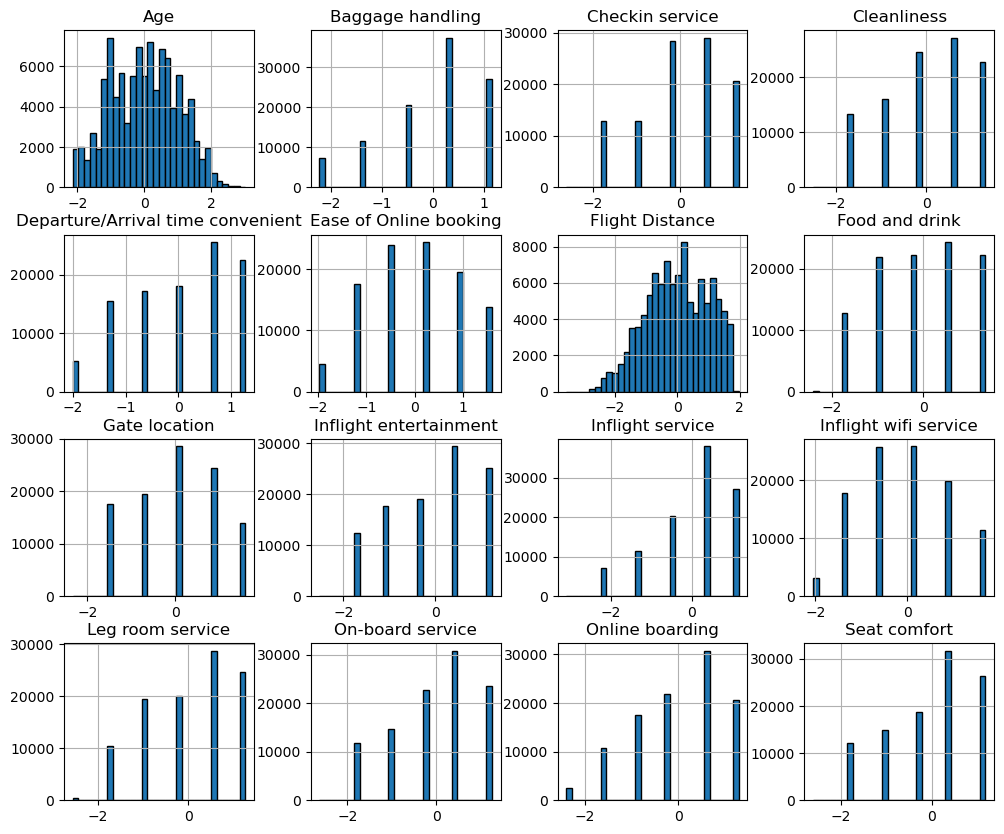

In [53]:
df[numerical_cols].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.show()

In [54]:
df.to_csv('../data/AirlineSatisfaction/prepared.csv')